<img src="UOC_Logo.jpg" width=150 height=100  />


# <div align="center">   Data Visualization
### <br><div align="left"> PEC2 Fernando Sevilla 

### Installation of all the required libraries to perform data exploration

In [9]:
! pip install pandas_profiling


In [15]:
!pip install plotly==4.14.3


     |████████████████████████████████| 13.2 MB 1.7 MB/s eta 0:00:01
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=e9a2d85c709990929727ce7c7db44e5eaba3423d0caf6b6187d86b47b906b091
  Stored in directory: /Users/fernandosevilla/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [416]:
import numpy as np 
import pandas as pd
from pandas_profiling import ProfileReport
from os.path import expanduser as ospath
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

A Data Frame is created to store the data.

In [417]:
df=pd.read_excel(r'PAX_all_agreements_data_.xlsx')

The PA-X Peace Agreement Database (www.peaceagreements.org) is a database and repository of peace agreements from 1990 to date, current up until 1 June 2020. PA-X provides a comprehensive dataset of peace agreements from 1990 to mid-2020, capable of underpinning both quantitative and qualitative research.  

PA-X has been designed to provide easy access to peace agreement texts and to allow users to explore patterns of agreements over time, both within processes and across processes. PA-X is primarily produced by a team of researchers at the University of Edinburgh, with additional collaborators - see more about the team in Acknowledgements. 

It aims to be accessible to:

• mediators and parties in conflict seeking to understand how compromise can be crafted

• civic actors seeking to influence on-going peace talks and proposals

• social science researchers interested in understanding peace agreements quantitatively and qualitatively.


In [456]:
df.shape

(1868, 266)

El dataset contienen más de 266 atributos. Para el análisis exploratorio se van a revisar tan solo aquellos atributos que son objeto de nuestra análisis.

El objetivo de nuestro análisis es obtener una visión general de todos los acuerdos existentes a nivel mundial. A continuación se separan todos aquellos tratados que no tengan que ver con problemas territoriales.

Antes de realizar el análisis de los datos se explorará la calidad de los datos. Se realizarán las transformaciones oportunas para facilitar la visualización de los datos.

Finalmente se creará un nuevo conjunto de datos y este será usado para la visualización.

La visualización e llevará a cabo experimentando con diferentes herramientas. 
Para este primer caso se usará python y las librerías oportunas.
Para el segundo caso se usará PowerBi; se crará uán Dasboard a partide del nuevo conjunto de datos generado inicialmente

A continuación se realizará un análisis detallado de los acuerdos por:

- Año
- País
- Región
- Tipo de problema en la definición de estado

Las atributos que se analizarán se listan a continuación y para ayudar a comprender los aspectos específicos de los datos, se comentará cada variable extrayendo la información directamnete del texto explicativo de las variables (Codebook) que se puede encontar en el siguiente enlace (www.peaceagreements.org):

* Con: Country/Entity
* Contp: Conflict type
* Reg: Region
* Agt: Agreement Name
* Dat: Date Signed
* Status: Agreement Definition and Status
* Lgt: Agreement length
* Agtp: Agreement type
* Stage: Agreement stage
* GCh: 1, 2 or 3 if the peace agreement includes any references to children, if not then 0
* StDef: 1 if the peace agreement addresses the issue of state definition, if not then 0
* StGen: 1 if the peace agreement includes any provision that explains the state's core principles, if not then 0
* StCon: State configuration: 1 if the peace agreement includes any declarations and references regarding the territorial nature of the state
* StSd: 1 if the peace agreements includes any refer- ence or provision on the state’s ‘self-determination’.
* StRef: 1 if there are any provisions in the peace agree- ment that refer to a referendum
* StSym: 1 if the peace agreement includes any mention of state symbols
* StInd: 1 if the peace agreement includes any mention of independence of the state or secession of the state
* StUni: 1 if the peace agreement includes any specific pro- visions concerning (external) border delimitation.
* StXbor: 1 if the peace agreement includes any mention of substantive cross-border linkages and connections which involve external involvement in governance 

In [460]:
columns = ['Con' , 'Loc1ISO' ,  'Contp', 'Reg', 'Agt', 'Dat', 'Status', 'Lgt', 
          'Agtp', 'Stage', 'GCh', 'StDef', 'StGen', 'StCon', 'StSd', 
          'StRef', 'StSym', 'StInd', 'StUni', 'StXbor']

## Se crea el nuevo dataframe con la información necesaria para la práctica.  

In [461]:
df2 = df[columns]

In [462]:
df2.head()

,Con,Loc1ISO,Contp,Reg,Agt,Dat,Status,Lgt,Agtp,Stage,GCh,StDef,StGen,StCon,StSd,StRef,StSym,StInd,StUni,StXbor
0,Afghanistan,AFG,Government/territory,Europe and Eurasia,"Resolution of Intra Afghan Peace Conference in Doha, Qatar (Doha Roadmap for Peace)",2019-07-08,Multiparty signed/agreed,2,Intra,Pre,0,1,1,0,0,0,0,0,0,0
1,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the Islamic Republic of Afghanistan and Hizb-e-Islami,2016-09-22,Multiparty signed/agreed,4,Intra,SubPar,0,1,0,0,0,0,1,0,0,0
2,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the two campaign teams regarding the structure of the national unity government,2014-09-21,Multiparty signed/agreed,4,Intra,Imp,2,0,0,0,0,0,0,0,0,0
3,Afghanistan,AFG,Government,Europe and Eurasia,Tokyo Declaration Partnership for Self-Reliance in Afghanistan from Transition to Transformation (Tokyo Conference),2012-07-08,Multiparty signed/agreed,14,InterIntra,Imp,1,1,1,0,0,0,0,0,0,1
4,Afghanistan,AFG,Government,Europe and Eurasia,Conclusions of the Conference on Afghanistan and the International Community: From Transition to the Transformation Decade (Bonn Conference),2011-12-05,Multiparty signed/agreed,7,InterIntra,Pre,1,1,1,0,0,0,0,0,0,0


## Se inicia el análisis exploratorio de la calidad de los datos

In [463]:
df2.describe(include="all")

,Con,Loc1ISO,Contp,Reg,Agt,Dat,Status,Lgt,Agtp,Stage,GCh,StDef,StGen,StCon,StSd,StRef,StSym,StInd,StUni,StXbor
count,1868,1833,1868,1868,1868,1868,1868,1868.000000,1868,1868,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
unique,170,82,5,6,1832,1534,4,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bosnia and Herzegovina/Yugoslavia (former),PHL,Government/territory,Africa (excl MENA),Joint Statement,1998-10-26,Multiparty signed/agreed,NaN,Intra,Pre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,133,159,843,584,8,9,1725,NaN,1270,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.274625,NaN,NaN,0.317987,0.330835,0.212527,0.099572,0.042827,0.049786,0.038009,0.031585,0.005889,0.072805
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.194469,NaN,NaN,0.773530,0.470640,0.409205,0.299508,0.202520,0.217561,0.191268,0.174938,0.076532,0.259886
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [464]:
df.describe(include="all")

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
count,1868,1868,1868.000000,1868,1868,1868.000000,1868.000000,1868,1868,1868,...,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.0
unique,170,5,NaN,157,6,NaN,NaN,1832,1534,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,NaN,Bosnia peace process,Africa (excl MENA),NaN,NaN,Joint Statement,1998-10-26,Multiparty signed/agreed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,133,843,NaN,124,584,NaN,NaN,8,9,1725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,84.870450,NaN,NaN,1155.105996,1.249465,NaN,NaN,NaN,...,0.177195,0.011242,0.102248,0.300321,0.193790,0.238758,0.009636,0.291756,0.383833,1.0
std,NaN,NaN,42.273883,NaN,NaN,663.722169,0.590838,NaN,NaN,NaN,...,0.553679,0.105459,0.303056,0.608157,0.395372,0.426439,0.097715,0.454692,0.486448,0.0
min,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,NaN,NaN,55.000000,NaN,NaN,568.750000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,NaN,NaN,90.000000,NaN,NaN,1135.500000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,NaN,NaN,123.000000,NaN,NaN,1736.250000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0


In [465]:
# Se obtiene información general del conjunto de datos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Con      1868 non-null   object
 1   Loc1ISO  1833 non-null   object
 2   Contp    1868 non-null   object
 3   Reg      1868 non-null   object
 4   Agt      1868 non-null   object
 5   Dat      1868 non-null   object
 6   Status   1868 non-null   object
 7   Lgt      1868 non-null   int64 
 8   Agtp     1868 non-null   object
 9   Stage    1868 non-null   object
 10  GCh      1868 non-null   int64 
 11  StDef    1868 non-null   int64 
 12  StGen    1868 non-null   int64 
 13  StCon    1868 non-null   int64 
 14  StSd     1868 non-null   int64 
 15  StRef    1868 non-null   int64 
 16  StSym    1868 non-null   int64 
 17  StInd    1868 non-null   int64 
 18  StUni    1868 non-null   int64 
 19  StXbor   1868 non-null   int64 
dtypes: int64(11), object(9)
memory usage: 292.0+ KB


In [466]:
# Se consulta el tamaño del conjunto de datos
nRow, nCol = df2.shape
print(f'Hay {nRow} filas y {nCol} columnas')
print("Nombre de las columnas:", list(df2.columns))

Hay 1868 filas y 20 columnas
Nombre de las columnas: ['Con', 'Loc1ISO', 'Contp', 'Reg', 'Agt', 'Dat', 'Status', 'Lgt', 'Agtp', 'Stage', 'GCh', 'StDef', 'StGen', 'StCon', 'StSd', 'StRef', 'StSym', 'StInd', 'StUni', 'StXbor']


In [467]:
# Se observa en detalle el tipo de datos de cada atributo
data_types = pd.DataFrame({
    'Column': df2.columns.values,
    'Data type': df2.dtypes.values,
    'Null value': df2.isnull().sum(),
    '% of missing values': 100 * df2.isna().sum().values / len(df2)
})
porcentaje=100 * df2.isna().sum().values / len(df2)
print(data_types)
print(f'El valor máximo de valores nulos es {max(porcentaje)} %')

          Column Data type  Null value  % of missing values
Con      Con      object    0           0.000000           
Loc1ISO  Loc1ISO  object    35          1.873662           
Contp    Contp    object    0           0.000000           
Reg      Reg      object    0           0.000000           
Agt      Agt      object    0           0.000000           
Dat      Dat      object    0           0.000000           
Status   Status   object    0           0.000000           
Lgt      Lgt      int64     0           0.000000           
Agtp     Agtp     object    0           0.000000           
Stage    Stage    object    0           0.000000           
GCh      GCh      int64     0           0.000000           
StDef    StDef    int64     0           0.000000           
StGen    StGen    int64     0           0.000000           
StCon    StCon    int64     0           0.000000           
StSd     StSd     int64     0           0.000000           
StRef    StRef    int64     0           

In [427]:
profile = ProfileReport(df2, minimal=False, explorative=True, title = "Evaluación del perfil de los datos")
# Si se desea exportar como archivo independiente se puede ejecutar la linea comentada siguiente:
profile.to_file(output_file="Data_profil.html")

In [428]:
# Se muestra el informe. 
profile.to_notebook_iframe()

Tras realizar el análisis de la calidad de los datos se ha verificado que:  

1. No existen registros vacios: Todos los atributos están completos
2. No Hay registros duplicados
3. Existen 18 variables categóricas y una numérica
4. Existe una gran correlación entre StDef, StGen y StXbor por loque seguramente la mayor cantidad de acuerdos estarán relacionados con la definición del tipo de estado y la participación externa en la gobernanza.
5. Otra correlación que a simple vista parece interesante es la que existe entre GCh y Lgt. Existe correlación entre la longitud del acuerdo y la implicación de menores en el mismo

Se renombrarán las columnas a continuación y se sustituirá las categoríasnuméricas por texto explicativo

In [468]:
new_columns ={'Con': 'País' ,'Loc1ISO': 'Código_Iso' , 'Contp': 'Conflicto_tipo', 'Reg': 'Región', 'Agt': 'Nombre_Acuerdo', 'Dat': 'Fecha', 
              'Status': 'Estado', 'Lgt': 'Longitud', 'Agtp': 'Acuerdo_tipo', 'Stage': 'Acuerdo_estado',
              'GCh': 'Referencia_menores', 'StDef': 'Estado_definición', 'StGen': 'Estado_carácter', 'StCon' :'Estado_territorio', 
              'StSd': 'Estado_autodeter', 'StRef' :'Etado_referendum', 'StSym': 'Estado_simbología', 'StInd': 'Estado_independ', 
              'StUni': 'Estado_adhesión', 'StXbor': 'Estado_cogobernanza'}

In [469]:
df3 = df2.rename(columns=new_columns)

In [470]:
print("Nombre de las columnas:\n\n", list(df3.columns))

Nombre de las columnas:

 ['País', 'Código_Iso', 'Conflicto_tipo', 'Región', 'Nombre_Acuerdo', 'Fecha', 'Estado', 'Longitud', 'Acuerdo_tipo', 'Acuerdo_estado', 'Referencia_menores', 'Estado_definición', 'Estado_carácter', 'Estado_territorio', 'Estado_autodeter', 'Etado_referendum', 'Estado_simbología', 'Estado_independ', 'Estado_adhesión', 'Estado_cogobernanza']


Se Sustituye la codificación de los valores de las variables por texto explicativo. Adcicionalmente, para ayudar a comprender los aspectos específicos de los datos, se comentará la codificación de cada variable

Referencia_menores:
- 0: Sin referncias
- 1: Una sóla referencia
- 2: Multiples referencias, modo de aplicación y referencia antidiscriminatoria
- 3: El acuerdo se trata fundamentalmente de diposiciones relativas a menores

Estado_definición: (Identidad del estado)
- 0: Sin referencia a la definición de estado
- 1: Sin referencia a la definición del estado

Estado_carácter: (democracia, identidad, etc..)
- 0: Sin referencia a la política de estado
- 1: Con referencia a la política de estado

Estado_territorio: (unitario, federal, etc.)
- 0: Sin referencia a la nnaturaleza territorial del estado
- 1: Con referencia a la nnaturaleza territorial del estado

Estado_autodeter: 
- 0: Sin referencia a la autodeterminación
- 1: Con referencia a la autodeterminación

Etado_referendum: 
- 0: Con referencia a un cambio en la naturaleza, el territorio, la jurisdicción del Estado o un asunto similar
- 1: Sin referencia a un cambio en la naturaleza, el territorio, la jurisdicción del Estado o un asunto similar

Estado_simbología:
- 0: Sin referencia a símbolos del estado
- 1: Con referencia a símbolos del estado

Estado_independ: (Identidad del estado)
- 0: Sin referencia a la independencia del Estado o de la secesión del Estado 
- 1: Con referencia a la independencia del Estado o de la secesión del Estado 

Estado_adhesión: (Identidad del estado)
- 0: Sin referencia a la a la adhesión o a la unificación con otro Estado 
- 1: Con referencia a la a la adhesión o a la unificación con otro Estado 


Estado_cogobernanza: (Grupos subestatales tienen conexión con los grupos "afines" de los Estados vecinos)
- 0: Sin referencia a vínculos y conexiones transfronterizas sustanciales que impliquen la participación externa en la gobernanza
- 1: Con referencia a vínculos y conexiones transfronterizas sustanciales que impliquen la participación externa en la gobernanza


In [471]:
df3['Referencia_menores'] = np.where((df3.Referencia_menores == 0),'Sin referencia','Con referencia')
df3['Estado_definición'] = np.where((df3.Estado_definición == 0),'Sin referencia','Con referencia')
df3['Estado_carácter'] = np.where((df3.Estado_carácter == 0),'Sin referencia','Con referencia')
df3['Estado_territorio'] = np.where((df3.Estado_territorio == 0),'Sin referencia','Con referencia')
df3['Estado_autodeter'] = np.where((df3.Estado_autodeter == 0),'Sin referencia','Con referencia')
df3['Etado_referendum'] = np.where((df3.Etado_referendum == 0),'Sin referencia','Con referencia')

df3['Estado_simbología'] = np.where((df3.Estado_simbología == 0),'Sin referencia','Con referencia')
df3['Estado_independ'] = np.where((df3.Estado_independ == 0),'Sin referencia','Con referencia')
df3['Estado_adhesión'] = np.where((df3.Estado_adhesión == 0),'Sin referencia','Con referencia')
df3['Estado_cogobernanza'] = np.where((df3.Estado_cogobernanza == 0),'Sin referencia','Con referencia')

Para una mejor comprensión se traducen y ajustan los valores de la columna Acuerdo_estado

In [472]:
nombres = {'Imp': 'Implementación', 'Pre': 'Pre-negociación', 'SubPar':'Parcial' , 'SubComp':'Integral' ,
         'Cea': 'Alto el fuego', 'Ren': 'Renovación' , 'Oth': 'Otros'}

df3['Acuerdo_estado'] = df3['Acuerdo_estado'].map(nombres)  

In [473]:
df3.head()

,País,Código_Iso,Conflicto_tipo,Región,Nombre_Acuerdo,Fecha,Estado,Longitud,Acuerdo_tipo,Acuerdo_estado,Referencia_menores,Estado_definición,Estado_carácter,Estado_territorio,Estado_autodeter,Etado_referendum,Estado_simbología,Estado_independ,Estado_adhesión,Estado_cogobernanza
0,Afghanistan,AFG,Government/territory,Europe and Eurasia,"Resolution of Intra Afghan Peace Conference in Doha, Qatar (Doha Roadmap for Peace)",2019-07-08,Multiparty signed/agreed,2,Intra,Pre-negociación,Sin referencia,Con referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia
1,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the Islamic Republic of Afghanistan and Hizb-e-Islami,2016-09-22,Multiparty signed/agreed,4,Intra,Parcial,Sin referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia
2,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the two campaign teams regarding the structure of the national unity government,2014-09-21,Multiparty signed/agreed,4,Intra,Implementación,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia
3,Afghanistan,AFG,Government,Europe and Eurasia,Tokyo Declaration Partnership for Self-Reliance in Afghanistan from Transition to Transformation (Tokyo Conference),2012-07-08,Multiparty signed/agreed,14,InterIntra,Implementación,Con referencia,Con referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia
4,Afghanistan,AFG,Government,Europe and Eurasia,Conclusions of the Conference on Afghanistan and the International Community: From Transition to the Transformation Decade (Bonn Conference),2011-12-05,Multiparty signed/agreed,7,InterIntra,Pre-negociación,Con referencia,Con referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia


Se ha detectado durante la comprensión de los datos que algunas variables hacer referencia a la identidad del estado. Se crará una nueva variable que agrupe a todas estas variables.

In [474]:
def label_indent (row):
    if row['Estado_definición'] == 'Con referencia' :
        return 'Con referencia'
    if row['Estado_independ'] == 'Con referencia' :
        return 'Con referencia'
    if row['Estado_adhesión'] == 'Con referencia' :
        return 'Con referencia'
    return 'Sin referencia'

In [475]:
df3.apply (lambda row: label_indent(row), axis=1)

0       Con referencia
1       Con referencia
2       Sin referencia
3       Con referencia
4       Con referencia
             ...      
1863    Sin referencia
1864    Con referencia
1865    Con referencia
1866    Con referencia
1867    Con referencia
Length: 1868, dtype: object

In [476]:
df3['Estado_identidad'] = df3.apply (lambda row: label_indent(row), axis=1)

Se crean nuevas columnas para separar la fecha y los paises

In [477]:
df3['Países_envueltos'] = df3['País'].apply(str.split, args = '/')
df3['Día'] = df3['Fecha'].apply(lambda date : int(date.split('-')[2]))
df3['Mes'] = df3['Fecha'].apply(lambda date : int(date.split('-')[1]))
df3['Año'] = df3['Fecha'].apply(lambda date : int(date.split('-')[0]))

In [478]:
df3.head()

,País,Código_Iso,Conflicto_tipo,Región,Nombre_Acuerdo,Fecha,Estado,Longitud,Acuerdo_tipo,Acuerdo_estado,...,Etado_referendum,Estado_simbología,Estado_independ,Estado_adhesión,Estado_cogobernanza,Estado_identidad,Países_envueltos,Día,Mes,Año
0,Afghanistan,AFG,Government/territory,Europe and Eurasia,"Resolution of Intra Afghan Peace Conference in Doha, Qatar (Doha Roadmap for Peace)",2019-07-08,Multiparty signed/agreed,2,Intra,Pre-negociación,...,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,[Afghanistan],8,7,2019
1,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the Islamic Republic of Afghanistan and Hizb-e-Islami,2016-09-22,Multiparty signed/agreed,4,Intra,Parcial,...,Sin referencia,Con referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,[Afghanistan],22,9,2016
2,Afghanistan,AFG,Government,Europe and Eurasia,Agreement between the two campaign teams regarding the structure of the national unity government,2014-09-21,Multiparty signed/agreed,4,Intra,Implementación,...,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,[Afghanistan],21,9,2014
3,Afghanistan,AFG,Government,Europe and Eurasia,Tokyo Declaration Partnership for Self-Reliance in Afghanistan from Transition to Transformation (Tokyo Conference),2012-07-08,Multiparty signed/agreed,14,InterIntra,Implementación,...,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,Con referencia,[Afghanistan],8,7,2012
4,Afghanistan,AFG,Government,Europe and Eurasia,Conclusions of the Conference on Afghanistan and the International Community: From Transition to the Transformation Decade (Bonn Conference),2011-12-05,Multiparty signed/agreed,7,InterIntra,Pre-negociación,...,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Sin referencia,Con referencia,[Afghanistan],5,12,2011


### El Dataframe está listo para ser visualizado y por tanto se exportará como archivo Excel para poder utilizarlos en otras aplicaciones y poder realizar la experimentación

In [479]:
df3.to_excel("PAX_optimizado.xlsx") 

### Estudio de la distribución geográfica

In [480]:
paises_lista = {}
for num, acuerdo in df3.iterrows():
    for pais in acuerdo['Países_envueltos']:
        if pais.strip('()') not in paises_lista: 
            paises_lista[pais.strip('()')] = 1
        else:
            paises_lista[pais.strip('()')] += 1
pais_df = pd.DataFrame.from_dict(paises_lista, orient = 'index', columns=['Acuerdos firmados'])

code_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

def return_country_code(con):
    if con in code_df['COUNTRY'].values:
        return code_df[code_df['COUNTRY'] == con]['CODE'].values[0]

pais_df['País'] = pais_df.index
pais_df['Código'] = pais_df['País'].apply(return_country_code)
paises = pais_df.dropna()

In [481]:
data=dict(
    type = 'choropleth',
    locations = paises['Código'],
    z = paises['Acuerdos firmados'],
    text = paises['País'],
    colorscale = 'Greys',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Peace Treaties Signed',
)


layout = dict(title_text='Acierdos de paz desde 1990',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)
iplot(fig)

Filipinas es el país que más acuerdos de paz ha firmado desde 1990, seguido de Bosnia Herzegovina, Colombia y Sudán. Vemos que cada región está "liderada" por un país que ha firmado un gran número de acuerdos.

Me sorprendió ver que Francia y Alemania han firmado uno, aquí está el acuerdo correspondiente para los interesados : https://en.wikipedia.org/wiki/Treaty_on_the_Final_Settlement_with_Respect_to_Germany

## Situación de los acuerdos firmados y su reparto regional

In [482]:
df_RAP=df3.groupby(['Región','Acuerdo_estado']).count()['País'].reset_index()

fig = px.bar(df_RAP, x="Región", y="País", color='Acuerdo_estado' , title="Long-Form Input")
fig.show()

De los resultados del gráfico se observan los siguientes puntos:

* África tiene una gran proporción de acuerdos de paz 'Parciales'
* En Europa, Asia y Pacífico y América, la granmayoría de los acuerdos se encuentran en "prenegociación", lo que significa que "pretenden que las partes lleguen al punto de negociar las incompatibilidades que están en el centro del conflicto". Esto también ilustra la actitud mayoritariamente "diplomática" de los países europeos a la hora de abordar los conflictos.
* La mayoría de los alto el fuego se produjeron en África, Europa y Asia
* La renovación de los acuerdos es mínima.

Para continuar con los paises se representa a continuación un "Word Cloud" para, de una manera más visual, ver si algún país aparece más que los otros.

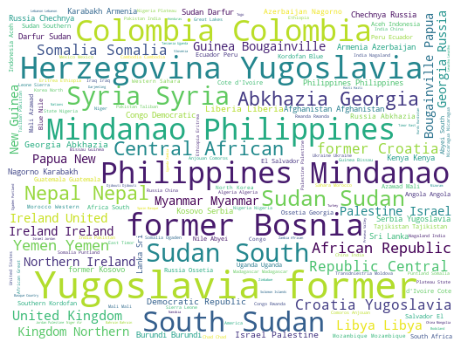

In [483]:
from wordcloud import WordCloud
pais = df3.País
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(pais))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

El conflicto de Yugoslavia y su disgregación se muestra resaltado aasí como Colombia y Filipinas.

## Situación de los acuerdos por asuntos de identidad de estado

In [484]:
df_REP=df3.groupby(['Región','Estado_identidad']).count()['Países_envueltos'].reset_index()
df_REP2=df3.groupby('Región').count()['Países_envueltos'].reset_index()

In [485]:
fig = px.bar(df_REP, x="Región", y="Países_envueltos", color='Estado_identidad' , 
             title="Acuerdos con mención o referencia a la identidad del estado ")
fig.show()

De la visualización obtenemos la siguiente infoemación:
-  Todas las regiones tienen menos acuerdos de paz originados por conflictos relacionados con la identidad del estado


In [486]:
layout = dict(title_text='Extensión de los tratados de paz por regiones ',
             barmode = 'stack')
data = [
    go.Bar(name='Menos de 2 páginas', x=df3[df3['Longitud'] <= 2].groupby('Región').count()['País'].index, y=df3[df3['Longitud'] <= 2].groupby('Región').count()['País'].values),
    go.Bar(name='Entre 2 y 6 páginas', x=df3[(df3['Longitud'] > 2) & (df3['Longitud'] <= 6)].groupby('Región').count()['País'].index, y=df3[(df3['Longitud'] > 2) & (df3['Longitud'] <= 6)].groupby('Región').count()['País'].values),
    go.Bar(name='Más de 6 páginas', x=df3[df3['Longitud'] > 6].groupby('Región').count()['País'].index, y=df3[df3['Longitud'] > 6].groupby('Región').count()['País'].values)
]
fig = go.Figure(data=data, layout = layout)
fig.show()

Este gráfico se deduce la siguiente afirmación:
- La situación más compleja actualmente se encuentra en África. Es la región con más tratados.

Adicionamete y atendiendo a la distribución de los tratados, Africa es la que más tratados extenso tiene, de esto se deduce como de compleja es la situcaión en áfrica.

## Situación en detalle de los tratados de más de 6 páginas

In [487]:
df3[df3['Longitud'] > 6]
lista_paises = {}
for num, acuerdos in df3[df3['Longitud'] > 6].iterrows():
    for pais in acuerdos['Países_envueltos']:
        if pais.strip('()') not in lista_paises: 
            lista_paises[pais.strip('()')] = 1
        else:
            lista_paises[pais.strip('()')] += 1
pais_df = pd.DataFrame.from_dict(lista_paises, orient = 'index', columns=['Cantidad de tratados'])

pais_df['Country'] = pais_df.index
pais_df['Code'] = pais_df['Country'].apply(return_country_code)
pais = pais_df.dropna()
data=dict(
    type = 'choropleth',
    locations = pais['Code'],
    z = pais['Cantidad de tratados'],
    text = pais['Country'],
    colorscale = 'Greys',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Nº tratados firmados',
)

layout = dict(title_text='Paises que han firmado tratados extensos desde 1990',
              geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ))

fig = go.Figure(data = [data], layout = layout)
iplot(fig)

Sudán y Sudán del Sur los que han firmado más acuerdos de paz largos. Esto puede mostrar lo compleja que es la situación en esta región.

## Evolución temporal

/Users/fernandosevilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/fernandosevilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Peace agreements per month')

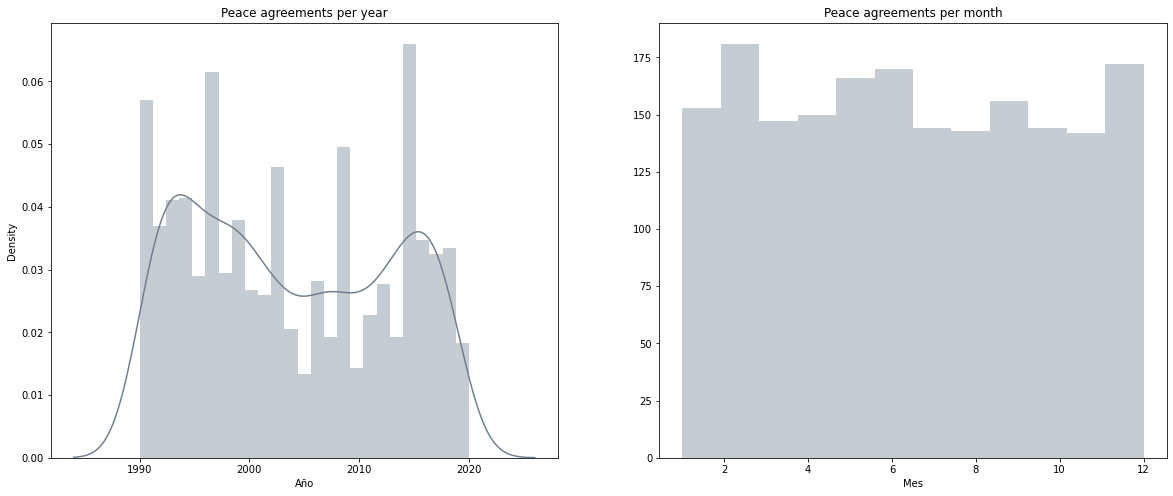

In [488]:
plt.figure(figsize = (20,8))
plt.subplot(121)
sns.distplot(df3['Año'], kde = True, bins = 25, color='slategrey').set_title('Peace agreements per year')
plt.subplot(122)
sns.distplot(df3['Mes'], kde = False, color='slategrey').set_title('Peace agreements per month')

In [489]:
import plotly.express as px

df3['Fecha'] = pd.to_datetime(df3['Fecha'])

df_grouped = (
    df3.groupby(
        # normalize all dates to start of month
        df3['Fecha'].astype('datetime64[M]')
    )['Región'].count().rename('Count').to_frame()
)


#print(df_grouped)

fig = px.line(
    df_grouped, 
    y='Count', 
    title='<b>Acuerdos por fecha (Mes/Año)</b>',
    #hover_data=['Names']
)
#fig.write_html('fig1.html', auto_open=True)
iplot(fig)

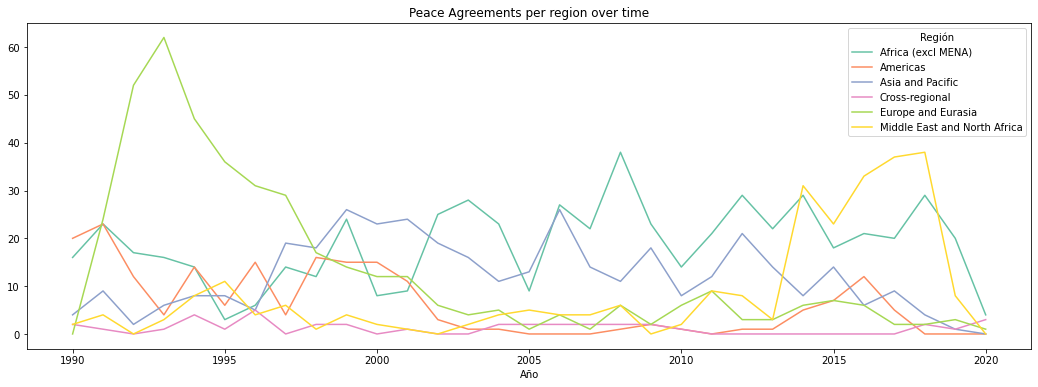

In [490]:
regions_evolution = pd.crosstab(df3.Año,df3.Región)
regions_evolution.plot(color=sns.color_palette('Set2',12), title='Peace Agreements per region over time')
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## Análisis de laos acurdos referentes a autodeterminación

In [491]:
xauto =  df3.Estado_autodeter[df3.Estado_autodeter == 'Con referencia']
sauto = df3.Estado_autodeter[df3.Estado_autodeter == 'Sin referencia']

trace1 = go.Histogram(
    x=xauto,
    opacity=0.75,
    name = "Por autodeterminación",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=sauto,
    opacity=0.75,
    name = "Sin autodeterminación",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Acuerdos derivados por prolemas de autodeterminación',
                   xaxis=dict(title='Tipo'),
                   yaxis=dict( title='Cantidad'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Casi la totalidad de los acuerdos no tienen por motivo asuntos relacionados con la autodeterminación

## Análisis de los acurdos referentes a referendum

In [492]:
xauto =  df3.Etado_referendum[df3.Etado_referendum == 'Con referencia']
sauto = df3.Etado_referendum[df3.Etado_referendum == 'Sin referencia']

trace1 = go.Histogram(
    x=xauto,
    opacity=0.75,
    name = "Por Referendum",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=sauto,
    opacity=0.75,
    name = "Sin Referendum",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Acuerdos derivados de Referendum',
                   xaxis=dict(title='Tipo'),
                   yaxis=dict( title='Cantidad'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Como en el caso anterio casi la totalidad de los acuerdos no tienen por motivo asuntos relacionados con la referendums